<a href="https://colab.research.google.com/github/pranilthorat/capstone-project-almabetter/blob/main/github_airbnb_capstone_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

* **AIRBNB** is an American company that operates an online marketplace for lodging, primarily homestays for vacation rentals, and tourism activities. Based in San Francisco, California, the platform is accessible via website and mobile app. Airbnb does not own any of the listed properties; instead, it profits by receiving commission from each booking. The company was founded in 2008 by Brian Chesky, Nathan Blecharczyk and Joe Gebbia. Airbnb is a shortened version of its original name, AirBedandBreakfast.com.

In [22]:
#import pandas,numpy,seaborn,matplotlib,warnings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')

Data Frame of Airbnb

In [23]:
#mount drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [24]:
#dataframe of airbnb_df
airbnb="/content/drive/MyDrive/Airbnb NYC 2019.csv"
airbnb_df=pd.read_csv(airbnb)


In [25]:
#head of airbnb_df
airbnb_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [26]:
#tail of airbnb_df
airbnb_df.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


In [27]:
#checking the size of the airbnb_df
airbnb_df.size

782320

In [28]:
#checking shape of airbnb_df
airbnb_df.shape

(48895, 16)


cleaning the data▶

In [29]:
#checking null values or unknown data 
airbnb_df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [30]:
#getting thoes colunms which is required for analysis of hosts 
airbnb_df_new=airbnb_df.loc[:,['host_id','host_name','price','number_of_reviews','reviews_per_month','availability_365']]
airbnb_df_new   

,host_id,host_name,price,number_of_reviews,reviews_per_month,availability_365
0,2787,John,149,9,0.21,365
1,2845,Jennifer,225,45,0.38,355
2,4632,Elisabeth,150,0,NaN,365
3,4869,LisaRoxanne,89,270,4.64,194
4,7192,Laura,80,9,0.10,0
...,...,...,...,...,...,...
48890,8232441,Sabrina,70,0,NaN,9
48891,6570630,Marisol,40,0,NaN,36
48892,23492952,Ilgar & Aysel,115,0,NaN,27
48893,30985759,Taz,55,0,NaN,2


In [31]:
#handeling missing values 
airbnb_df_new.fillna({'reviews_per_month':0}, inplace=True)
airbnb_df_new.dropna(subset=['host_name'],inplace=True)

In [32]:
#lenght of new airbnb_df
len(airbnb_df_new)

48874

In [33]:
#checking null values or missing data 
airbnb_df_new.isnull().sum()

host_id              0
host_name            0
price                0
number_of_reviews    0
reviews_per_month    0
availability_365     0
dtype: int64

In [34]:
#we have clean data now
print(type(airbnb_df_new["host_id"]))
print(type(airbnb_df_new['host_name']))
print(type(airbnb_df_new["availability_365"]))
print(type(airbnb_df_new["number_of_reviews"]))
print(type(airbnb_df_new["reviews_per_month"]))
print(type(airbnb_df_new["price"]))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [35]:
#head of airbnb_df_new
airbnb_df_new.head()

,host_id,host_name,price,number_of_reviews,reviews_per_month,availability_365
0,2787,John,149,9,0.21,365
1,2845,Jennifer,225,45,0.38,355
2,4632,Elisabeth,150,0,0.00,365
3,4869,LisaRoxanne,89,270,4.64,194
4,7192,Laura,80,9,0.10,0


In [36]:
#tail of airbnb_df_new
airbnb_df_new.tail()

,host_id,host_name,price,number_of_reviews,reviews_per_month,availability_365
48890,8232441,Sabrina,70,0,0.0,9
48891,6570630,Marisol,40,0,0.0,36
48892,23492952,Ilgar & Aysel,115,0,0.0,27
48893,30985759,Taz,55,0,0.0,2
48894,68119814,Christophe,90,0,0.0,23


# Now, we have to Explore and analyze the data to discover key understandings such as : 
 * What can we learn about different hosts and areas?
Let us first start with Hosts,
Well we can learn following points about hosts

# 1] There are how many hosts which has availability of 365 days i.e 24x7 
# 2] which host has the highest	number of reviews
# 3] which host has the highest number of reviews per month 
# 4] which host has most expensive room per night
# 5] which host has cheapest room per night

1] There are how many hosts which has availability of 365 days i.e 24x7

In [37]:
#lets see max days availability host has 
airbnb_df_new["availability_365"].max()

365

In [38]:
#how many hosts has availability of 365 days
availability_365_days=airbnb_df_new.loc[:,['host_id','availability_365']]
host_available_365_days=availability_365_days[availability_365_days['availability_365']>364]
how_many_host_available_for_365_days=host_available_365_days['host_id'].nunique()
print(how_many_host_available_for_365_days)

894


so there are total 894 hosts which has availability of 365 days

2] which host has the highest number of reviews

In [39]:
#groupby host_id and host_name for getting highest number of reviews 
groupby_host_id_and_host_name=airbnb_df_new.groupby(['host_id','host_name']).sum()[['number_of_reviews']].reset_index()
highest_number_of_reviews=groupby_host_id_and_host_name.sort_values('number_of_reviews',ascending=False).head(10)
highest_number_of_reviews

,host_id,host_name,number_of_reviews
21304,37312959,Maya,2273
1052,344035,Brooklyn& Breakfast -Len-,2205
18626,26432133,Danielle,2017
20872,35524316,Yasu & Akiko,1971
21921,40176101,Brady,1818
7362,4734398,Jj,1798
14707,16677326,Alex And Zeena,1355
9201,6885157,Randy,1346
34629,219517861,Sonder (NYC),1281
17517,23591164,Angela,1269


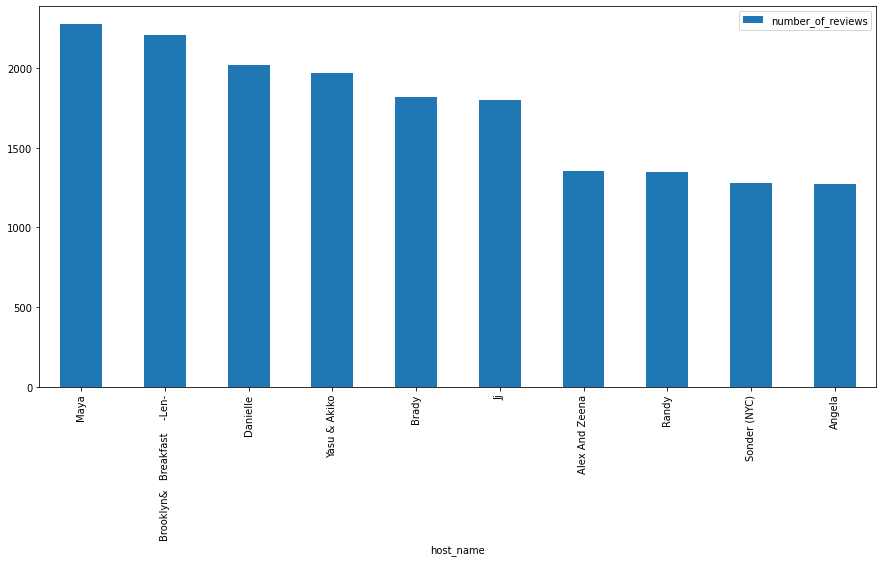

In [40]:
#visualizing highest number of reviews
plt.rcParams['figure.figsize']=(15,7)
highest_number_of_reviews.plot(kind='bar',x='host_name',y='number_of_reviews')

maya has the highest number of reviews

3] which host has the highest number of reviews per month

In [41]:
#groupby host_id and host_name for getting highest number of reviews per month
groupby_host_id_and_host_name=airbnb_df_new.groupby(['host_id','host_name']).sum()[['reviews_per_month']].reset_index()
highest_number_of_reviews_per_month=groupby_host_id_and_host_name.sort_values('reviews_per_month',ascending=False).head(10)
highest_number_of_reviews_per_month

,host_id,host_name,reviews_per_month
34629,219517861,Sonder (NYC),397.56
35807,244361589,Row NYC,111.72
35389,232251881,Lakshmee,80.63
18626,26432133,Danielle,68.02
31055,137274917,David,62.89
34897,224414117,Gabriel,59.10
32102,156948703,Asad,56.44
1052,344035,Brooklyn& Breakfast -Len-,56.00
32091,156684502,Nalicia,54.38
21304,37312959,Maya,53.53


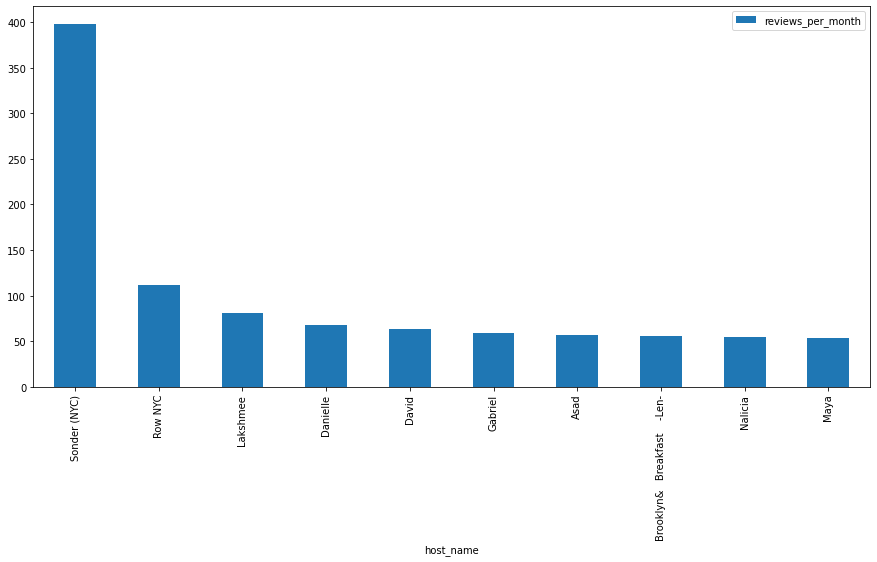

In [42]:
#visualizing highest number of reviews
plt.rcParams['figure.figsize']=(15,7)
highest_number_of_reviews_per_month.plot(kind='bar',x='host_name',y='reviews_per_month')

sonder (NYC)	has the highest number of reviews per month